In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from utils import load_position_dataframe
full_df = pd.read_csv('../LinearMobility_results.csv')

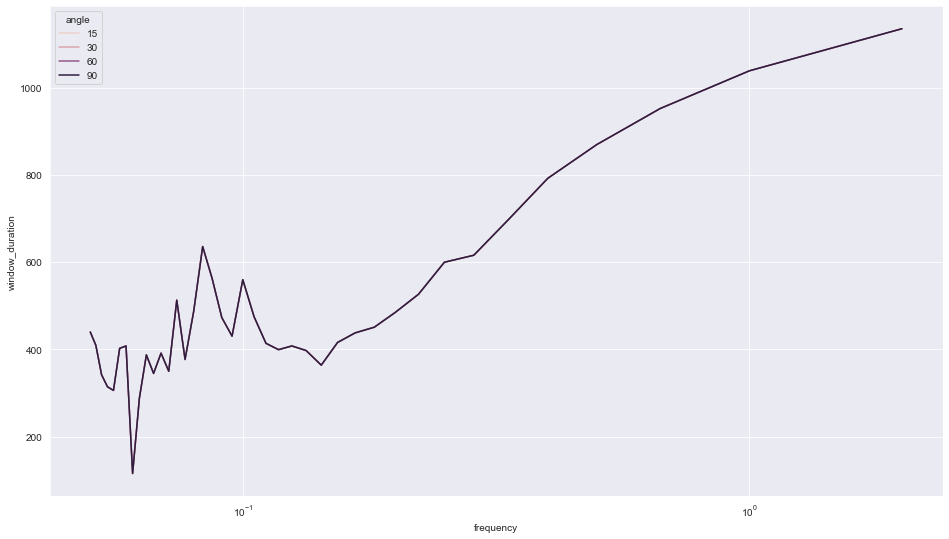

In [4]:
time = 60
seed = 20
speed = 0.5
angles = [15, 30, 60, 90]

angles_df = full_df[(full_df['time']==time) & (full_df['seed']==seed) & (full_df['speed']==speed) & (full_df['angle'].isin(angles))]
angles_df = angles_df.drop(["told_by", "hop", "start", "end", "sim_time"], axis=1).groupby(["node", "seen_id", "broadcast_time", "frequency", "angle", "seed", "speed", "time"], as_index=False).sum()

a4_dims = (16,9)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(data=angles_df[['frequency', 'angle', 'window_duration']], x="frequency", y="window_duration", hue='angle')
plot.set(xscale='log')
plt.show()

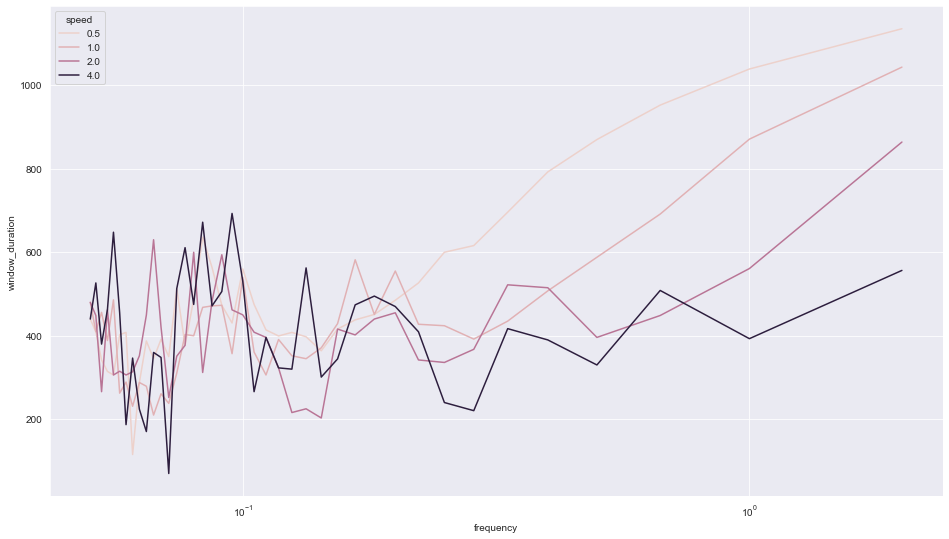

In [6]:
time = 60
seed = 20
speeds = [0.5, 1, 2, 4]
angle = 30

speeds_df = full_df[(full_df['time']==time) & (full_df['seed']==seed) & (full_df['speed'].isin(speeds)) & (full_df['angle']==angle)]
speeds_df = speeds_df.drop(["told_by", "hop", "start", "end", "sim_time"], axis=1).groupby(["node", "seen_id", "broadcast_time", "frequency", "angle", "seed", "speed", "time"], as_index=False).sum()

a4_dims = (16,9)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(data=speeds_df[['frequency', 'speed', 'window_duration']], x="frequency", y="window_duration", hue='speed')
plot.set(xscale='log')
plt.show()

In [11]:
def build_position_dataframe(model, seed, angle, speed, nodes, broadcast_times, log_position_time, window_threshold_time, sim_time):
    path = f'../{model}/seed{seed}_time{time}_angle{angle}_speed{speed}'
    this_df = pd.DataFrame()
    for bt in broadcast_times:
        partial_df = pd.DataFrame()
        for node in nodes:
            df = load_position_dataframe(node, bt, log_position_time, window_threshold_time, sim_time, path)
            partial_df = pd.concat([partial_df, df], axis=1)
        partial_df['seed'] = seed
        partial_df['time'] = sim_time
        partial_df['angle'] = angle
        partial_df['speed'] = speed
        this_df = pd.concat([this_df, partial_df])
    return this_df

In [14]:
time = 60
seed = 20
speeds = [0.5, 1, 2, 4]
angle = 30
model = 'LinearMobility'
bts = list(np.arange(1, 20.5, 0.5)) #seconds
lp = 0.1 #seconds
wt = 5 #seconds
nodes = [1, 2]

full_position_df = pd.DataFrame()
for speed in speeds:
    position_df = build_position_dataframe(model, seed, angle, speeds[1], nodes, bts, lp, wt, time)
    full_position_df = pd.concat([full_position_df, position_df])



,node_1,timestamp_1,x_pos_1,y_pos_1,broadcast_time,frequency,log_position_time,sim_time,node_2,timestamp_2,x_pos_2,y_pos_2,broadcast_time,frequency,log_position_time,sim_time,seed,time,angle,speed
0,1,0.1,3.03658,4.40880,1.0,1.00,0.1,3600,2,0.1,4.38540,4.69226,1.0,1.00,0.1,3600,20,60,30,1
1,1,0.2,3.13251,4.38055,1.0,1.00,0.1,3600,2,0.2,4.31315,4.62312,1.0,1.00,0.1,3600,20,60,30,1
2,1,0.3,3.22843,4.35230,1.0,1.00,0.1,3600,2,0.3,4.24089,4.55399,1.0,1.00,0.1,3600,20,60,30,1
3,1,0.4,3.32436,4.32404,1.0,1.00,0.1,3600,2,0.4,4.16864,4.48486,1.0,1.00,0.1,3600,20,60,30,1
4,1,0.5,3.42028,4.29579,1.0,1.00,0.1,3600,2,0.5,4.09639,4.41572,1.0,1.00,0.1,3600,20,60,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,1,3599.6,4.11827,2.57723,20.0,0.05,0.1,3600,2,3599.6,3.62843,3.77382,20.0,0.05,0.1,3600,20,60,30,1
35996,1,3599.7,4.02234,2.60548,20.0,0.05,0.1,3600,2,3599.7,3.55617,3.84295,20.0,0.05,0.1,3600,20,60,30,1
35997,1,3599.8,3.92641,2.63373,20.0,0.05,0.1,3600,2,3599.8,3.48392,3.91209,20.0,0.05,0.1,3600,20,60,30,1
35998,1,3599.9,3.83049,2.66199,20.0,0.05,0.1,3600,2,3599.9,3.41167,3.98122,20.0,0.05,0.1,3600,20,60,30,1
